#### SQL INTO PYTHON

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print("--- Starting Database Setup ---")

--- Starting Database Setup ---


In [3]:
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [5]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        ID INTEGER PRIMARY KEY AUTOINCREMENT,
        Product TEXT NOT NULL,
        Country TEXT NOT NULL,
        Quantity INTEGER NOT NULL,
        Price REAL NOT NULL
    )
''')
sample_data = [
    ('Laptop',"africa", 27, 4200.00),
    ('Mouse',"america", 5, 25.50),
    ('Keyboard',"asia", 3, 75.00),
    ('Monitor',"UK", 7, 120.00),
    ('Laptop',"Iceland", 1, 1200.00),
]
cursor.executemany("INSERT INTO sales (Product, Country, Quantity, Price) VALUES (?, ?, ?, ?)", sample_data)
conn.commit()
print("Sample data inserted successfully.")

Sample data inserted successfully.


In [6]:
query = """
    SELECT
        Product,
        SUM(Quantity) AS total_qty,
        SUM(Quantity * Price) AS total_revenue
    FROM
        sales
    GROUP BY
        Product
    ORDER BY
        total_revenue DESC
"""


In [7]:
df = pd.read_sql_query(query, conn)

In [8]:
print("\n--- Basic Sales Summary ---")
print(df)


--- Basic Sales Summary ---
    Product  total_qty  total_revenue
0    Laptop        246      1024200.0
1   Monitor         63         7560.0
2    Marker          6         7200.0
3  Keyboard         27         2025.0
4      shoe         30          765.0
5     Mouse         15          382.5


In [9]:
total_overall_revenue = df['total_revenue'].sum()
print(f"\nOverall Total Revenue: ${total_overall_revenue:,.2f}")


Overall Total Revenue: $1,042,132.50


#### BAR CHART

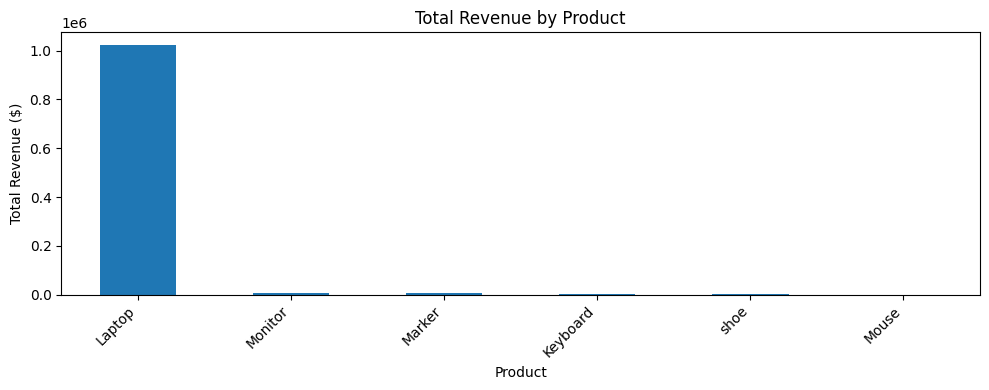

In [13]:
plt.figure(figsize=(10, 4))
df.plot(kind='bar', x='Product', y='total_revenue', legend=False,
        title='Total Revenue by Product', ax=plt.gca())
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### SAVING CHART

In [12]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>